In [1]:
#  Colab only
from google.colab import drive
%matplotlib inline


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys


PATH = "/content/drive/My Drive/Colab Notebooks/EECS553ML_reproduce/"
sys.path.append(PATH)

In [3]:
import torch
import resnet34 as resnet


model = resnet.resnet34()
model.load_state_dict(
    torch.load(
        PATH + "mnist_resnet34_model.t7", 
        map_location=torch.device("cpu")
    )
)

model.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
BATCH_SIZE = 128
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10, MNIST


##########################
### DATASET
##########################

DATA = MNIST

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = DATA(root='data', 
                     train=True, 
                     transform=transforms.ToTensor(), 
                     download=True)

test_dataset = DATA(root='data', 
                    train=False, 
                    transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print(DEVICE)
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

cpu
Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


for batch_idx, (features, targets) in enumerate(test_loader):
    features = features
    targets = targets
    break

In [7]:
len(features)

128

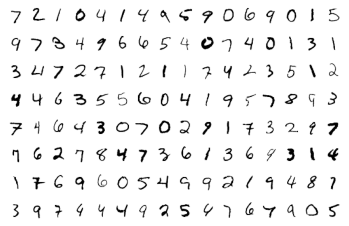

In [8]:
rows = 8
row_len = len(features) // rows

for i, x in enumerate(features):    
    nhwc_img = np.transpose(features[i], axes=(1, 2, 0))
    nhw_img = np.squeeze(nhwc_img.numpy(), axis=2)
    plt.subplot(rows, row_len, i + 1)
    plt.axis('off')
    plt.imshow(nhw_img, cmap='Greys')

In [9]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(DEVICE)

In [10]:
from trainer import Trainer


trainer = Trainer(model, train_loader, DEVICE)
trainer.model.eval()

for j in range(features.shape[0]):
    logits, probas = trainer.model(features.to(device)[j, None])
    print(np.argmax(probas.detach().numpy()[0]), end=" ")
    if (j+1) % row_len is 0:
        print()

Training on cpu
7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 
9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 
3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 
4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 
7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 
7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 
1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 
3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 
